In [1]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

In [2]:
def correctFunction(x):
    return 15 + 2 * x - 0.5 * x**2 - 0.35 * x**3

In [3]:
npoints = 21

In [4]:
x_list = np.linspace(-5, 5, npoints)
data0 = np.array([x_list, correctFunction(x_list)])

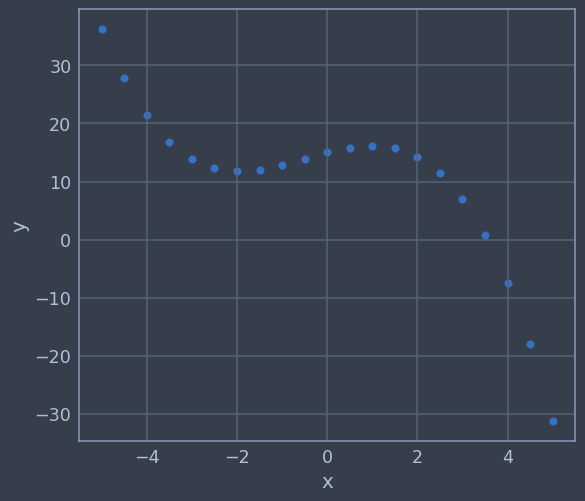

In [5]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data0[0], data0[1])

Modify x and y values bu adding random numbers

In [6]:
0.1*(2*np.random.rand(npoints)-1)

array([-0.01296083,  0.01800854, -0.08303898, -0.04630171, -0.03225059,
       -0.09590827, -0.03429882,  0.05124605, -0.09880039, -0.07307529,
        0.05294024,  0.07059491, -0.08197114, -0.01243126, -0.03113018,
        0.01451332, -0.08797958, -0.04854603,  0.00834891,  0.00272636,
       -0.02715017])

In [7]:
data = np.array([data0[0] + 0.25 * (2*np.random.rand(npoints)-1), data0[1] + 5.0 * (2*np.random.rand(npoints)-1) ])

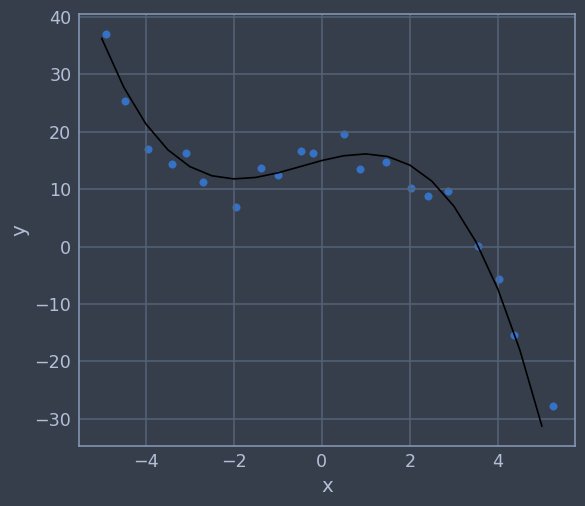

In [8]:
plt.xlabel('x')
plt.ylabel('y')
plt.plot(data0[0], data0[1], 'black')
plt.scatter(data[0], data[1])

# Spline Interpolation

A spline interpolation always fits the data perfectly and even has a continous derivative if a cubic spline is used

The spline is defined piecewise

## Unperturbed data

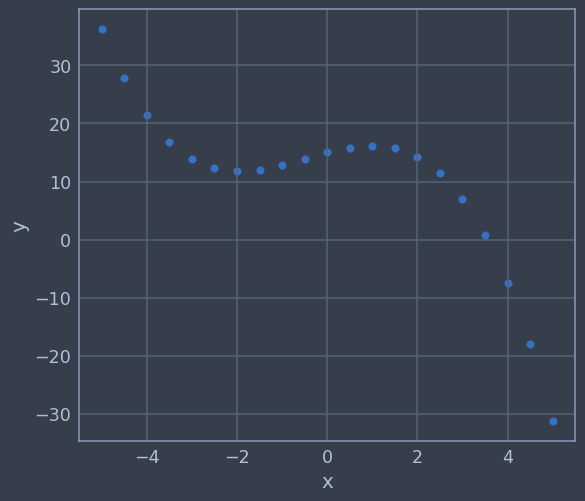

In [9]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data0[0], data0[1])

In [10]:
from scipy import interpolate

- linear splines

In [11]:
splineLinear0 = interpolate.interp1d(data0[0], data0[1], kind='linear')

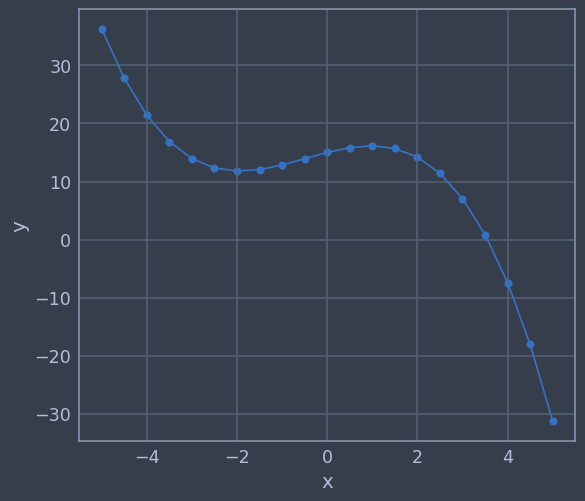

In [12]:
plt.xlabel('x')
plt.ylabel('y')
plt.plot(data0[0], splineLinear0(data0[0]))
plt.scatter(data0[0], data0[1])

- zoom

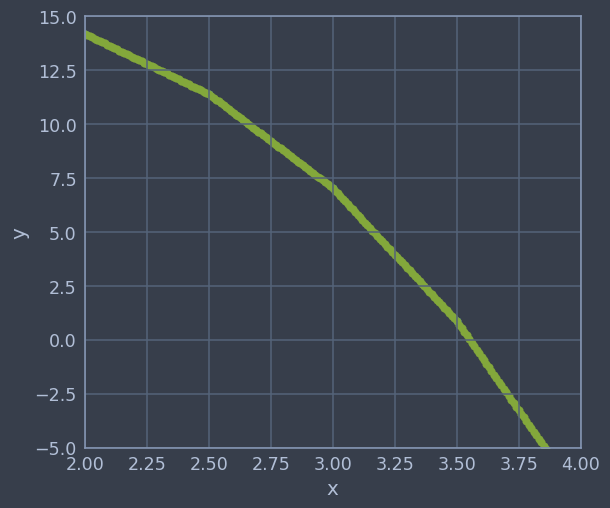

In [13]:
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([2,4])
plt.ylim(-5,15)
plt.scatter(data0[0], data0[1])


x_list = np.linspace(2,4,201)
plt.scatter(x_list, splineLinear0(x_list))

- cubic spline

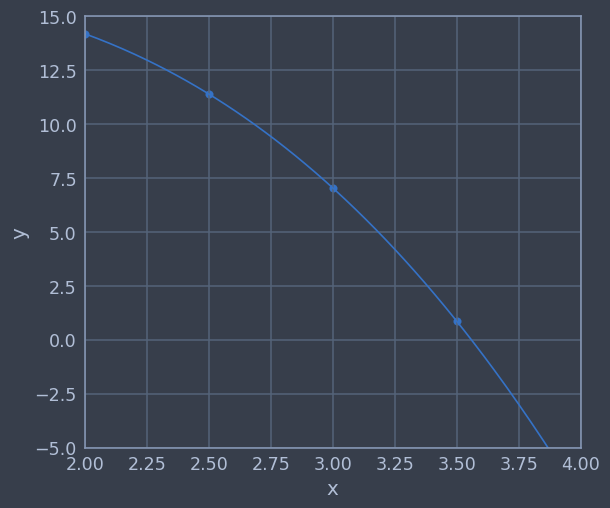

In [14]:
splineCubic0 = interpolate.interp1d(data0[0], data0[1], kind='cubic')

plt.xlabel('x')
plt.ylabel('y')
plt.xlim([2,4])
plt.ylim(-5,15)
plt.scatter(data0[0], data0[1])


x_list = np.linspace(2,4,201)
plt.plot(x_list, splineCubic0(x_list))

## Pertubed data

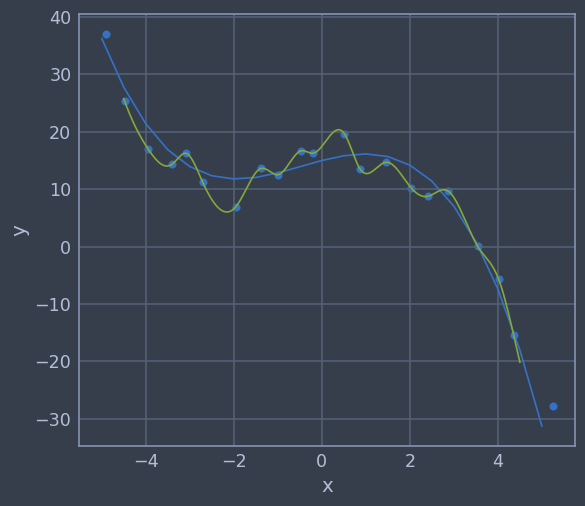

In [15]:
splineCubic = interpolate.interp1d(data[0], data[1], kind='cubic')

plt.xlabel('x')
plt.ylabel('y')

plt.plot(data0[0], data0[1])

x_list = np.linspace(-4.5, 4.5, 901)

plt.scatter(data[0], data[1])
plt.plot(x_list, splineCubic(x_list))

- How to handle data which is not smooth?

In [16]:
splineSmooth = interpolate.UnivariateSpline(data[0], data[1])
splineSmooth.set_smoothing_factor(500)

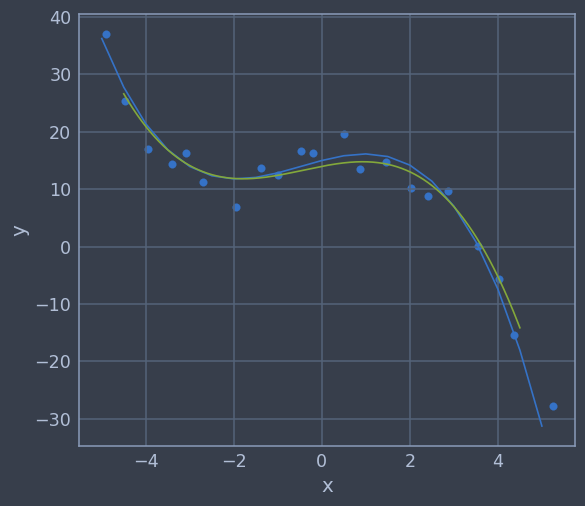

In [17]:
plt.xlabel('x')
plt.ylabel('y')

plt.plot(data0[0], data0[1])

x_list = np.linspace(-4.5, 4.5, 901)

plt.scatter(data[0], data[1])
plt.plot(x_list, splineSmooth(x_list))

In [18]:
datapoly = data[:,7:14]

In [19]:
datapoly

array([[-1.37969738, -0.9883702 , -0.4766811 , -0.19400912,  0.51261285,
         0.86564752,  1.46435807],
       [13.6274449 , 12.53904796, 16.6765768 , 16.27458732, 19.67178883,
        13.5585914 , 14.69950481]])

We have 7 data points.  Therefore we need a 6th order polynomial for a perfect interpolation

In [20]:
x = np.transpose(
    np.array(
        [datapoly[0,:]**0,datapoly[0,:]**1, datapoly[0,:]**2,datapoly[0,:]**3,datapoly[0,:]**4,datapoly[0,:]**5,datapoly[0,:]**6]
    )
)

In [21]:
x

array([[ 1.00000000e+00, -1.37969738e+00,  1.90356487e+00,
        -2.62634347e+00,  3.62355922e+00, -4.99941518e+00,
         6.89768005e+00],
       [ 1.00000000e+00, -9.88370196e-01,  9.76875644e-01,
        -9.65514771e-01,  9.54286023e-01, -9.43187863e-01,
         9.32218773e-01],
       [ 1.00000000e+00, -4.76681102e-01,  2.27224873e-01,
        -1.08313803e-01,  5.16311429e-02, -2.46115901e-02,
         1.17318799e-02],
       [ 1.00000000e+00, -1.94009116e-01,  3.76395370e-02,
        -7.30241329e-03,  1.41673475e-03, -2.74859455e-04,
         5.33252399e-05],
       [ 1.00000000e+00,  5.12612851e-01,  2.62771935e-01,
         1.34700271e-01,  6.90490901e-02,  3.53954509e-02,
         1.81441630e-02],
       [ 1.00000000e+00,  8.65647523e-01,  7.49345634e-01,
         6.48669192e-01,  5.61518879e-01,  4.86077427e-01,
         4.20771720e-01],
       [ 1.00000000e+00,  1.46435807e+00,  2.14434456e+00,
         3.14008826e+00,  4.59821359e+00,  6.73343118e+00,
         9.8601543

In [22]:
y = datapoly[1,:]

In [23]:
a = np.linalg.solve(x,y)

In [24]:
a

array([ 16.82768063,   5.39339869,  12.21426971, -10.39314885,
       -29.6889575 ,   3.26680148,  11.25105558])

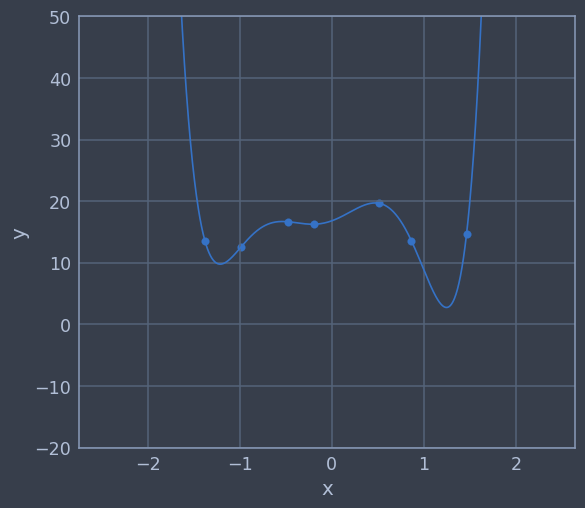

In [25]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-20,50])

x_list = np.linspace(-2.5,2.4,901)
y_list = a[0]*x_list**0 + a[1]*x_list**1 +a[2]*x_list**2 + a[3]*x_list**3 + a[4]*x_list**4 + a[5]*x_list**5 + a[6]*x_list**6
plt.scatter(datapoly[0], datapoly[1])
plt.plot(x_list, y_list)

## 2.3 Fitting a model function
Choose ideal parameters of a (physically motivated) model function such that error is minimized.
### 2.3.1 Define model function
For practice, we consider a polynomial: \\( f(x) = a_0 + a_1 x + a_2 x^2 + \dots + a_n x^n = \sum_{k=0}^n a_k x^k\\)

In [26]:
def polynomialModel(x, a):
    t = 0
    for k in range(len(a)):
        t = t + a[k] * x**k
    return t

In [27]:
a0 = np.array([-2, 2.4, -0.5, -0.35])

In [28]:
polynomialModel(x_list, a0)

array([-5.65625   , -5.66523846, -5.67410127, -5.68283879, -5.69145134,
       -5.69993928, -5.70830292, -5.71654263, -5.72465872, -5.73265155,
       -5.74052145, -5.74826877, -5.75589383, -5.76339698, -5.77077856,
       -5.7780389 , -5.78517835, -5.79219724, -5.79909592, -5.80587472,
       -5.81253397, -5.81907403, -5.82549523, -5.83179791, -5.8379824 ,
       -5.84404904, -5.84999818, -5.85583016, -5.8615453 , -5.86714396,
       -5.87262647, -5.87799316, -5.88324439, -5.88838048, -5.89340177,
       -5.89830861, -5.90310134, -5.90778028, -5.91234579, -5.9167982 ,
       -5.92113784, -5.92536507, -5.92948021, -5.9334836 , -5.93737559,
       -5.94115652, -5.94482672, -5.94838652, -5.95183628, -5.95517633,
       -5.958407  , -5.96152865, -5.96454159, -5.96744619, -5.97024276,
       -5.97293166, -5.97551322, -5.97798779, -5.98035569, -5.98261726,
       -5.98477286, -5.98682281, -5.98876746, -5.99060714, -5.99234219,
       -5.99397295, -5.99549977, -5.99692297, -5.99824291, -5.99

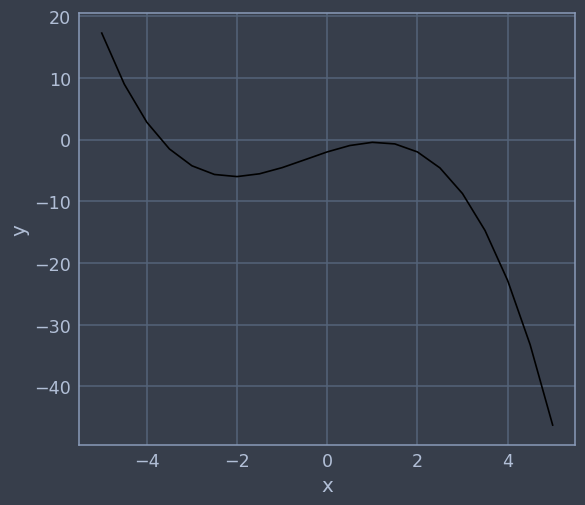

In [29]:
plt.xlabel('x')
plt.ylabel('y')

x_list = np.linspace(-5,5,npoints)
plt.plot(x_list, polynomialModel(x_list, a0), 'black')


### 2.3.2 Define error 
There are many reasonable definitions of an error function but a very common choice is: \\( \Delta = \sum_{i=1}^n \left(y_i-f(x_i)\right)^2\\)

\\( f \\) is the fit function that is determined by the coefficients \\( a_i \\) in our case.

\\( (x_i, y_i) \\) are the data points that we try to fit.

In [30]:
def errorFit(f, coefficients, data):
    # f: the fit function
    # coefficients: ai that we try to optimise
    # data: The data we try to fit
    
    error = 0
    for i in range(len(data[0])):
        error = error + (data[1,i] - f(data[0,i], coefficients))**2
        #print(error)
    return error

In [31]:
errorFit(polynomialModel, a0, data)

6364.718168532775

### 2.3.3 Update coefficients to reduce the error (gradient descent)
We can use several different methods to minimize the error, e. g. a Monte-Carlo algorithm. Here, we will use the gradient descent method. The coefficients \\( a_i \\) will be updated along the gradient direction of the error function \\( \nabla_{\vec{a}} \Delta\\). The gradient consists of elements 
\\( \frac{\partial}{\partial a_k} \Delta = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) \frac{\partial}{\partial a_k}f(x_i) = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) x_i^{k}\\)

In [32]:
def errorFitGradient(f, coefficients, data):
    # f: the fit function
    # coefficients: ai that we try to optimise
    # data: The data we try to fit
    return -2 * np.array([
            np.sum(np.array([(data[1,i] - f(data[0,i], coefficients)) * data[0,i]**k for i in range(len(data[0]))]))
        for k in range(len(coefficients))])

In [33]:
errorFitGradient(polynomialModel, a0, data)

array([ -718.56699004,    16.61475624, -6939.06493739, -1653.381261  ])

In [34]:
iteratsions = 100000
h = 0.00001
a = 2*np.random.rand(4)-1

In [35]:
a

array([-0.39776614,  0.06685454, -0.90723881,  0.77882696])

In [36]:
for i in range(iteratsions):
    a = a - h*errorFitGradient(polynomialModel, a, data)

In [37]:
print(a)
print(a0)

[13.98316434  1.47527536 -0.3822454  -0.29644851]
[-2.    2.4  -0.5  -0.35]


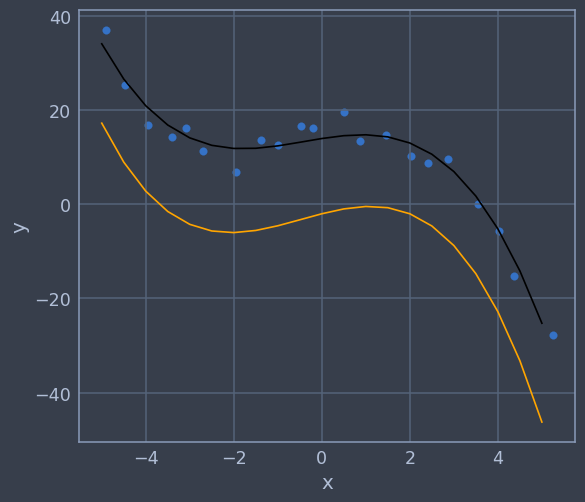

In [39]:
plt.xlabel('x')
plt.ylabel('y')

x_list = np.linspace(-5,5,npoints)
plt.plot(x_list, polynomialModel(x_list, a), 'black')
plt.plot(x_list, polynomialModel(x_list, a0), 'orange')
plt.scatter(data[0], data[1])